## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

## Data Preparation¶

In [3]:
%%time
df_movies = pd.read_csv('movies_26M.csv')
df_ratings = pd.read_csv('ratings_26M.csv')
df_tags = pd.read_csv('tags_26M.csv')
df_links = pd.read_csv('links_26M.csv')
df_genome_scores = pd.read_csv('genome-scores_26M.csv')
df_genome_tags = pd.read_csv('genome-tags_26M.csv')

CPU times: user 14.4 s, sys: 1.58 s, total: 16 s
Wall time: 16.1 s


In [13]:
df_genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [14]:
df_tags.head()

,userId,movieId,tag,timestamp
0,1,318,narrated,1425942391
1,20,4306,Dreamworks,1459855607
2,20,89302,England,1400778834
3,20,89302,espionage,1400778836
4,20,89302,jazz,1400778841


In [15]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
df_test = pd.merge(df_tags,df_movies,on='movieId')

In [17]:
df_test.head(20)

,userId,movieId,tag,timestamp,title,genres
0,1,318,narrated,1425942391,"Shawshank Redemption, The (1994)",Crime|Drama
1,489,318,classic,1454107381,"Shawshank Redemption, The (1994)",Crime|Drama
2,489,318,prison,1454107375,"Shawshank Redemption, The (1994)",Crime|Drama
3,540,318,classic,1154193826,"Shawshank Redemption, The (1994)",Crime|Drama
4,583,318,great cast,1139027056,"Shawshank Redemption, The (1994)",Crime|Drama
5,620,318,twist ending,1266939250,"Shawshank Redemption, The (1994)",Crime|Drama
6,741,318,magical negro,1427585442,"Shawshank Redemption, The (1994)",Crime|Drama
7,741,318,prison,1427585442,"Shawshank Redemption, The (1994)",Crime|Drama
8,741,318,suicide,1427585442,"Shawshank Redemption, The (1994)",Crime|Drama
9,1025,318,dramatic,1433114796,"Shawshank Redemption, The (1994)",Crime|Drama


In [6]:
n_movies = df_movies.title.nunique()
n_users = df_ratings.userId.nunique()
n_genres = df_movies.genres.nunique()
print('Num of Movies: '+ str(n_movies))
print('Num. of Users: '+ str(n_users))
print('Num. of genres: '+ str(n_genres))

Num of Movies: 45797
Num. of Users: 270896
Num. of genres: 1558


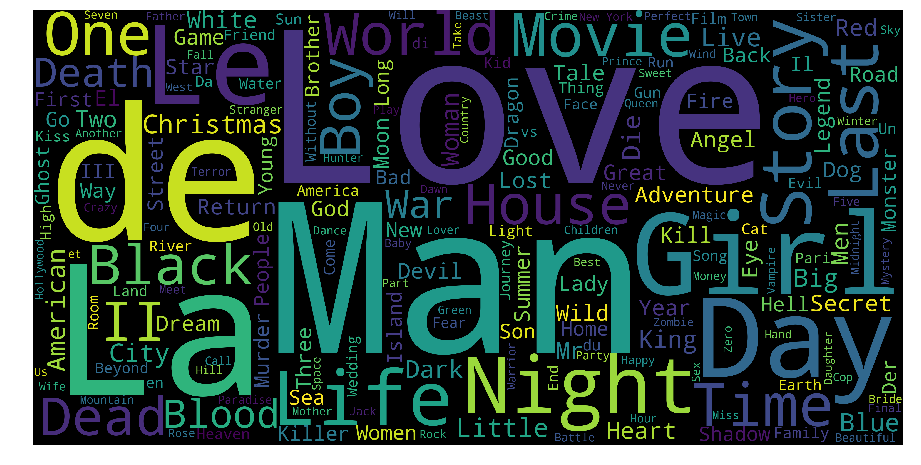

In [7]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
df_movies['title'] = df_movies['title'].fillna("").astype('str')
title_corpus = ' '.join(df_movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# Get summary statistics of rating

In [8]:
df_ratings['rating'].describe()

count    2.602429e+07
mean     3.528090e+00
std      1.065443e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [ ]:
#mean ratings = 3.53

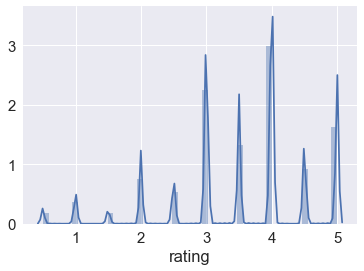

In [9]:
sns.set_style('whitegrid')
sns.set(font_scale=1.5)

# Display distribution of rating
sns.distplot(df_ratings['rating'].fillna(df_ratings['rating'].median()))

In [10]:
# Check the file info
print(df_ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 794.2 MB
None


In [13]:
# Make a census of the genre keywords
genre_labels = set()
for s in df_movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [14]:
print(genre_labels)

{'Children', 'Documentary', 'Animation', 'Mystery', '(no genres listed)', 'Adventure', 'Thriller', 'Fantasy', 'Horror', 'Crime', 'Western', 'Film-Noir', 'Sci-Fi', 'IMAX', 'Romance', 'War', 'Musical', 'Action', 'Drama', 'Comedy'}


In [15]:
# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [16]:
# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(df_movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 19806],
 ['Comedy', 13002],
 ['Thriller', 6761],
 ['Romance', 6069],
 ['Action', 5775]]

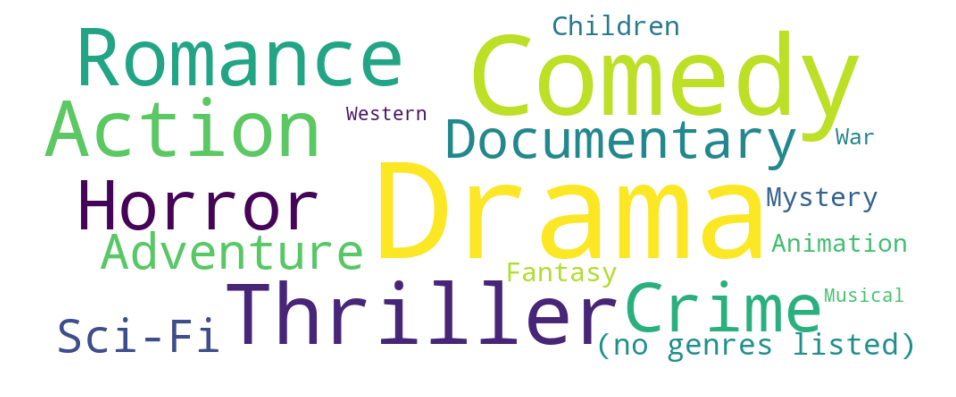

In [17]:
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [19]:
df_ratings_movies = pd.merge(df_ratings,df_movies,on='movieId')
df_ratings_movies.head()

,userId,movieId,rating,timestamp,title,genres
0,1,110,1.0,1425941529,Braveheart (1995),Action|Drama|War
1,11,110,3.5,1231676989,Braveheart (1995),Action|Drama|War
2,22,110,5.0,1111937009,Braveheart (1995),Action|Drama|War
3,24,110,5.0,979870012,Braveheart (1995),Action|Drama|War
4,29,110,3.0,1044020005,Braveheart (1995),Action|Drama|War


In [20]:
df_ratings_movies.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Great Migrations (2010)       5.0
Spicy Love Soup (1997)        5.0
Malibu Hot Summer (1981)      5.0
Augusta, Gone (2006)          5.0
Make Way For A Lady (1936)    5.0
Name: rating, dtype: float64

In [21]:
df_ratings_movies.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Forrest Gump (1994)                          91921
Shawshank Redemption, The (1994)             91082
Pulp Fiction (1994)                          87901
Silence of the Lambs, The (1991)             84078
Matrix, The (1999)                           77960
Star Wars: Episode IV - A New Hope (1977)    77045
Jurassic Park (1993)                         74355
Schindler's List (1993)                      67662
Braveheart (1995)                            66512
Toy Story (1995)                             66008
Name: rating, dtype: int64

In [22]:
ratings = pd.DataFrame(df_ratings_movies.groupby('title')['rating'].mean())
ratings.head(20)
ratings.rename(index=str, columns={"title": "title", "B": "rating"})

,rating
title,
"""Great Performances"" Cats (1998)",2.796804
#1 Cheerleader Camp (2010),2.785714
#Horror (2015),2.000000
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.625000
$ (Dollars) (1971),2.758621
"$1,000 on the Black (1966)",3.000000
"$100,000 for Ringo (1965)",2.500000
$5 a Day (2008),2.971698
$50K and a Call Girl: A Love Story (2014),3.750000


In [23]:
ratings['num of ratings'] = pd.DataFrame(df_ratings_movies.groupby('title')['rating'].count())
ratings.head(10)

,rating,num of ratings
title,,
"""Great Performances"" Cats (1998)",2.796804,219
#1 Cheerleader Camp (2010),2.785714,7
#Horror (2015),2.000000,12
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.625000,4
$ (Dollars) (1971),2.758621,29
"$1,000 on the Black (1966)",3.000000,1
"$100,000 for Ringo (1965)",2.500000,1
$5 a Day (2008),2.971698,53
$50K and a Call Girl: A Love Story (2014),3.750000,2


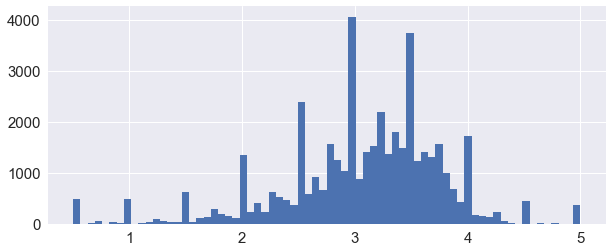

In [24]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

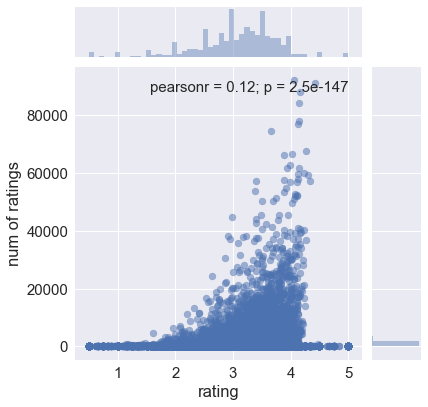

In [25]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)